In [1]:
#Install necessary libraries
suppressWarnings({
library(extrafont)
library(ggplot2)
library(reshape2)
library(tidyr)
})

Registering fonts with R


Caricamento pacchetto: ‘tidyr’


Il seguente oggetto è mascherato da ‘package:reshape2’:

    smiths




# Euroarea banks during the recent monetary policy
How have banks reacted by changing interest rates on deposits during the recent monetary policy tightnening (July 2022-today)?

We estimate the deposit beta of euroarea banks with a breakdown by banks' country of domicile and type of deposits from ECB SDW website.

We import the dataset containing the deposit interest rates of euroarea banks up today with a breakdown by type of deposit (overnightH_EU, overnightC_EU: overnight deposits for (respectively) Households and Non-financial Corporations), (agreedH, agreedC: maturity deposits for Households and Non-financial Corporations). 

We import also dataset containing the Main Refinancing Operation rate, the Marginal Lending Facility, and the Deposit Facility Rate.

In [46]:
overnightH_EU <- read.csv("/Users/mariapiabellini/Desktop/portfolio/betas/overnightH_EU.csv", header=TRUE)
overnightC_EU <- read.csv("/Users/mariapiabellini/Desktop/portfolio/betas/overnightC_EU.csv", header=TRUE)

In [47]:
agreedH_EU <- read.csv("/Users/mariapiabellini/Desktop/portfolio/betas/agreedH_EU.csv", header=TRUE)
agreedC_EU <- read.csv("/Users/mariapiabellini/Desktop/portfolio/betas/agreedC_EU.csv", header=TRUE)

In [48]:
MRO <- read.csv("/Users/mariapiabellini/Desktop/portfolio/betas/MRO.csv", header=TRUE)
MLF <- read.csv("/Users/mariapiabellini/Desktop/portfolio/betas/MLF.csv", header=TRUE)
DFR <- read.csv("/Users/mariapiabellini/Desktop/portfolio/betas/DFR.csv", header=TRUE)

## 1. Data Cleaning

In [49]:
#On deposits to HHs
overnightH_EU<-overnightH_EU[,-2]
colnames(overnightH_EU)<-c('Date','Rate')
overnightH_EU$Date<-as.Date.character(overnightH_EU$Date, '%Y-%m-%d')
#On deposits to NFCs
overnightC_EU<-overnightC_EU[,-2]
colnames(overnightC_EU)<-c('Date','Rate')
overnightC_EU$Date<-as.Date.character(overnightC_EU$Date, '%Y-%m-%d')
#Am deposits to HH
agreedH_EU<-agreedH_EU[,-2]
colnames(agreedH_EU)<-c('Date','Rate')
agreedH_EU$Date<-as.Date.character(agreedH_EU$Date, '%Y-%m-%d')
#On deposits to NFCs
agreedC_EU<-agreedC_EU[,-2]
colnames(agreedC_EU)<-c('Date','Rate')
agreedC_EU$Date<-as.Date.character(agreedC_EU$Date, '%Y-%m-%d')
#MRO
MRO<-MRO[,-2]
colnames(MRO)<-c('Date','Rate')
MRO$Date<-as.Date.character(MRO$Date, '%Y-%m-%d')
#MLF
MLF<-MLF[,-2]
colnames(MLF)<-c('Date','Rate')
MLF$Date<-as.Date.character(MLF$Date, '%Y-%m-%d')
#DFR
DFR<-DFR[,-2]
colnames(DFR)<-c('Date','Rate')
DFR$Date<-as.Date.character(DFR$Date, '%Y-%m-%d')

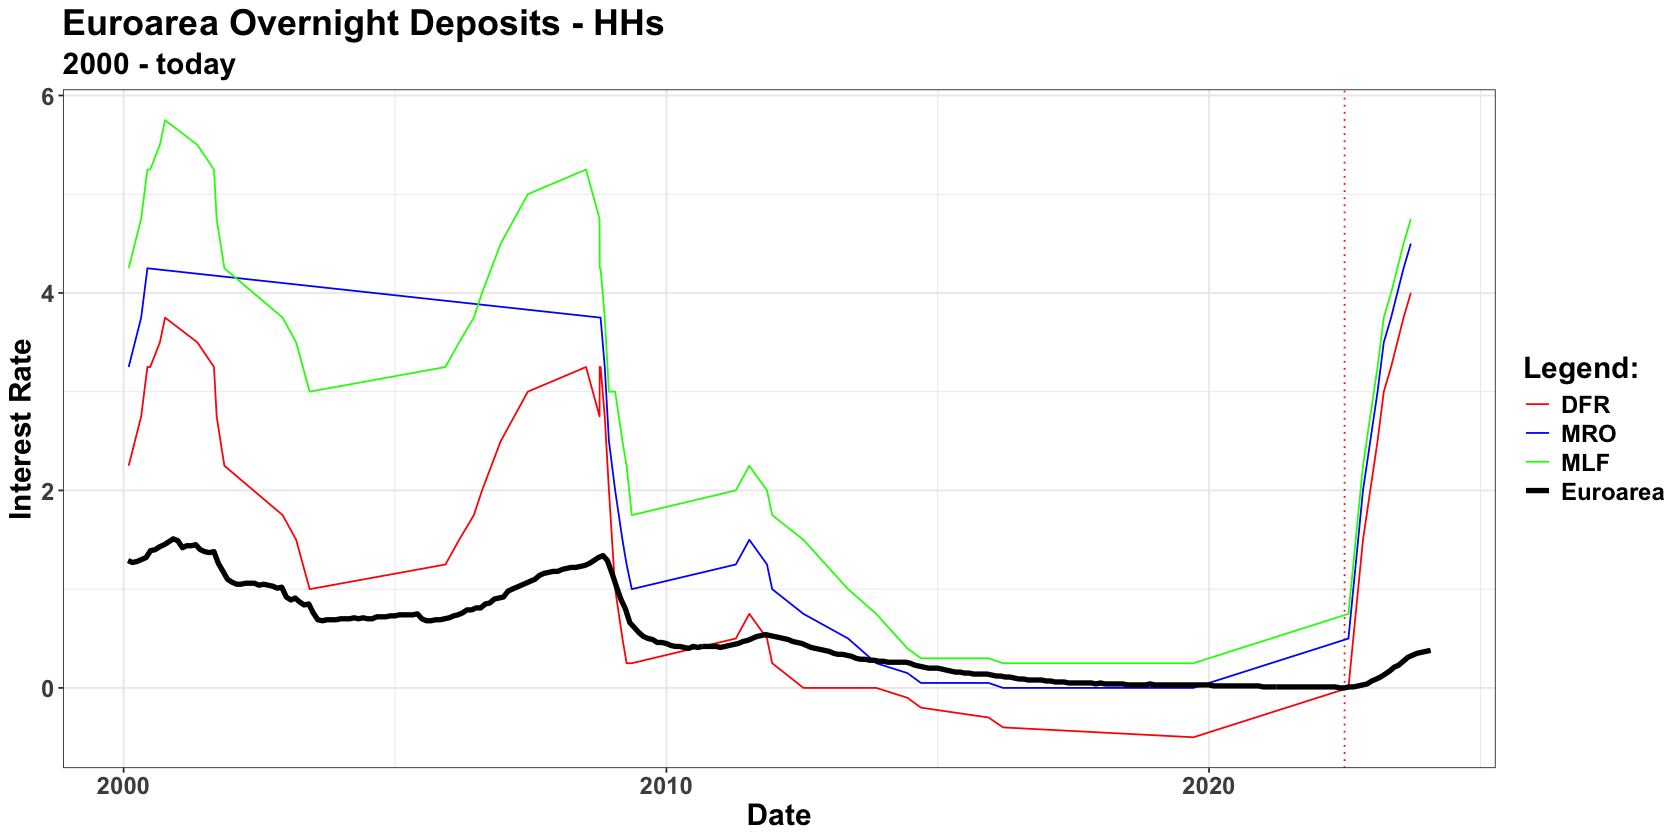

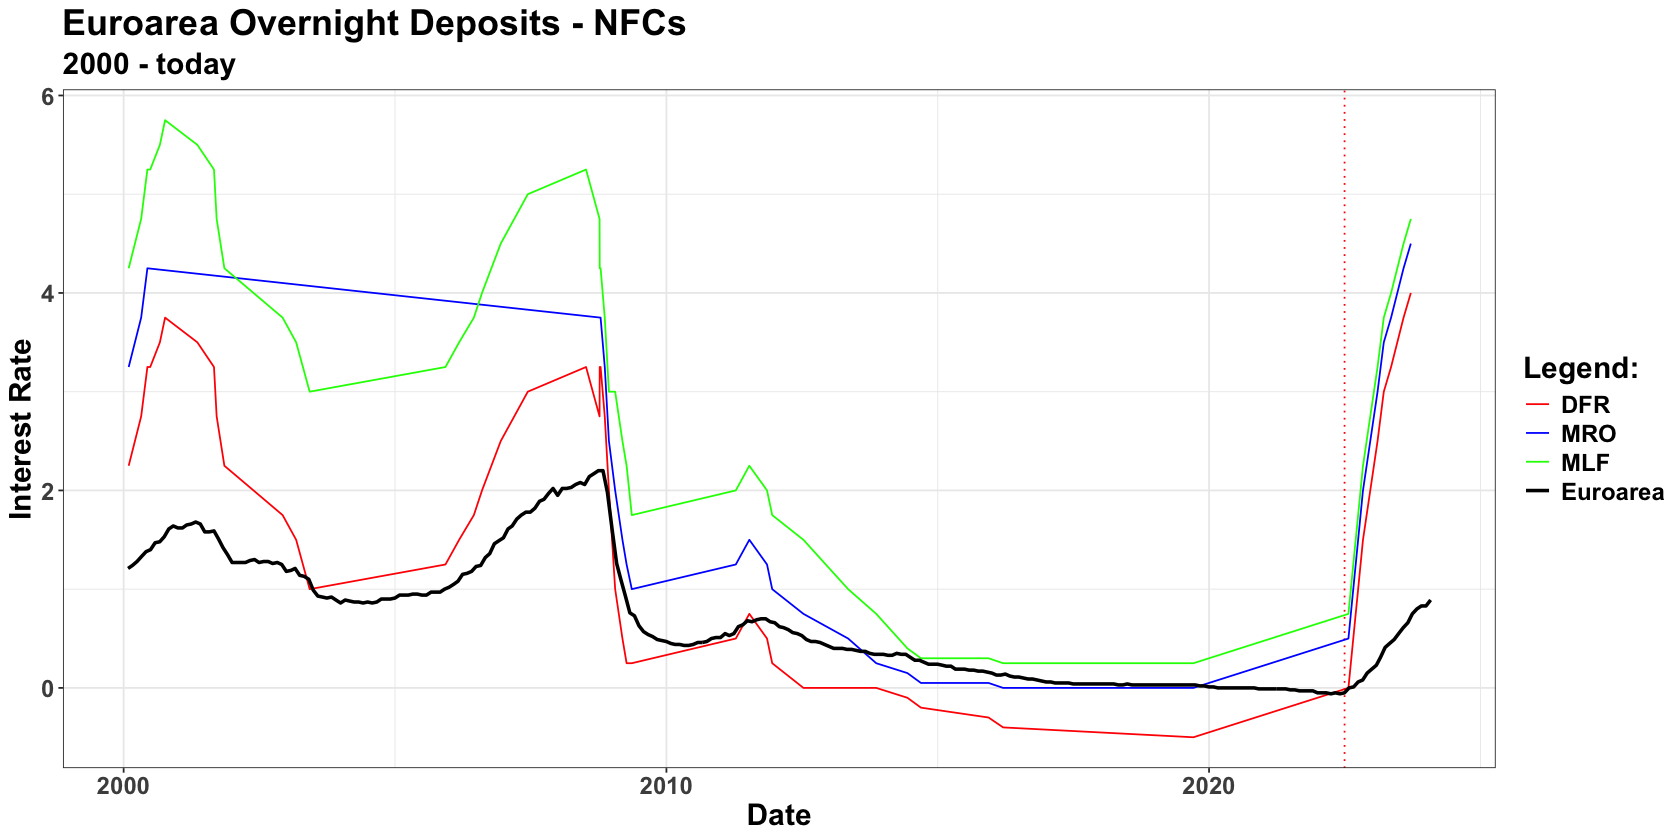

In [81]:
DFR1 <- subset(DFR, Date >= as.Date("2000-01-31"))
MRO1 <- subset(MRO, Date >= as.Date("2000-01-31"))
MLF1 <- subset(MLF, Date >= as.Date("2000-01-31"))

suppressWarnings({
  options(repr.plot.width=14)
  overnightH_EU_long <- melt(overnightH_EU, id.vars = "Date")
  
  ggplot(data = overnightH_EU_long, aes(x = Date, y = value, color = variable)) +
    geom_line() + 
    geom_vline(xintercept = as.numeric(as.Date("2022-07-01")), linetype = "dotted", color = "red") +
    ggtitle("Euroarea Overnight Deposits - HHs") +
    labs(x = "Date", y = "Interest Rate", subtitle = "2000 - today",
         color = "Legend:") +
    scale_color_manual(values = c("Euroarea" = "black", "DFR" = "red", "MRO" = "blue", "MLF" = "green")) +
    geom_line(data = DFR1, aes(x = Date, y = Rate, color = "DFR")) +
    geom_line(data = MRO1, aes(x = Date, y = Rate, color = "MRO")) +
    geom_line(data = MLF1, aes(x = Date, y = Rate, color = "MLF")) +
    geom_line(data = overnightH_EU, aes(x = Date, y = Rate, color = "Euroarea"), size = 1.5) +# Increase size of Rate line
    theme_bw() +
    theme(text = element_text(face = "bold", size = 18))
})
suppressWarnings({
  options(repr.plot.width=14)
  overnightC_EU_long <- melt(overnightC_EU, id.vars = "Date")
  
  ggplot(data = overnightC_EU_long, aes(x = Date, y = value, color = variable)) +
    geom_line() + 
    geom_vline(xintercept = as.numeric(as.Date("2022-07-01")), linetype = "dotted", color = "red") +
    ggtitle("Euroarea Overnight Deposits - NFCs") +
    labs(x = "Date", y = "Interest Rate", subtitle = "2000 - today",
         color = "Legend:") +
    scale_color_manual(values = c("Euroarea" = "black", "DFR" = "red", "MRO" = "blue", "MLF" = "green")) +
    geom_line(data = DFR1, aes(x = Date, y = Rate, color = "DFR")) +
    geom_line(data = MRO1, aes(x = Date, y = Rate, color = "MRO")) +
    geom_line(data = MLF1, aes(x = Date, y = Rate, color = "MLF")) +
    geom_line(data = overnightC_EU, aes(x = Date, y = Rate, color = "Euroarea"), size = 1.0) +# Increase size of Rate line
    theme_bw() +
    theme(text = element_text(face = "bold", size = 18))
})

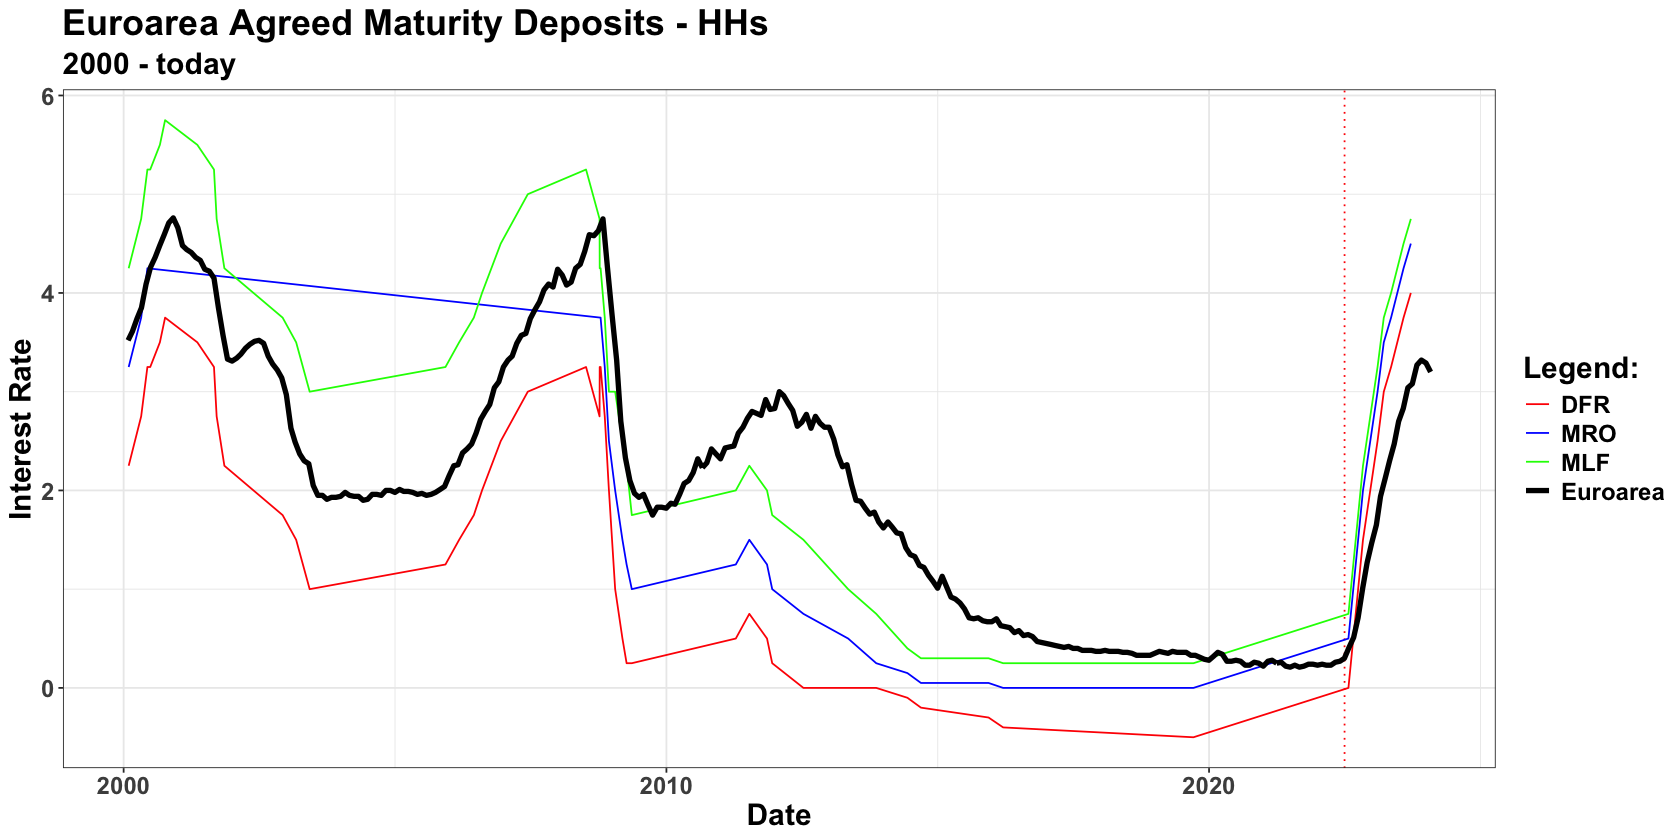

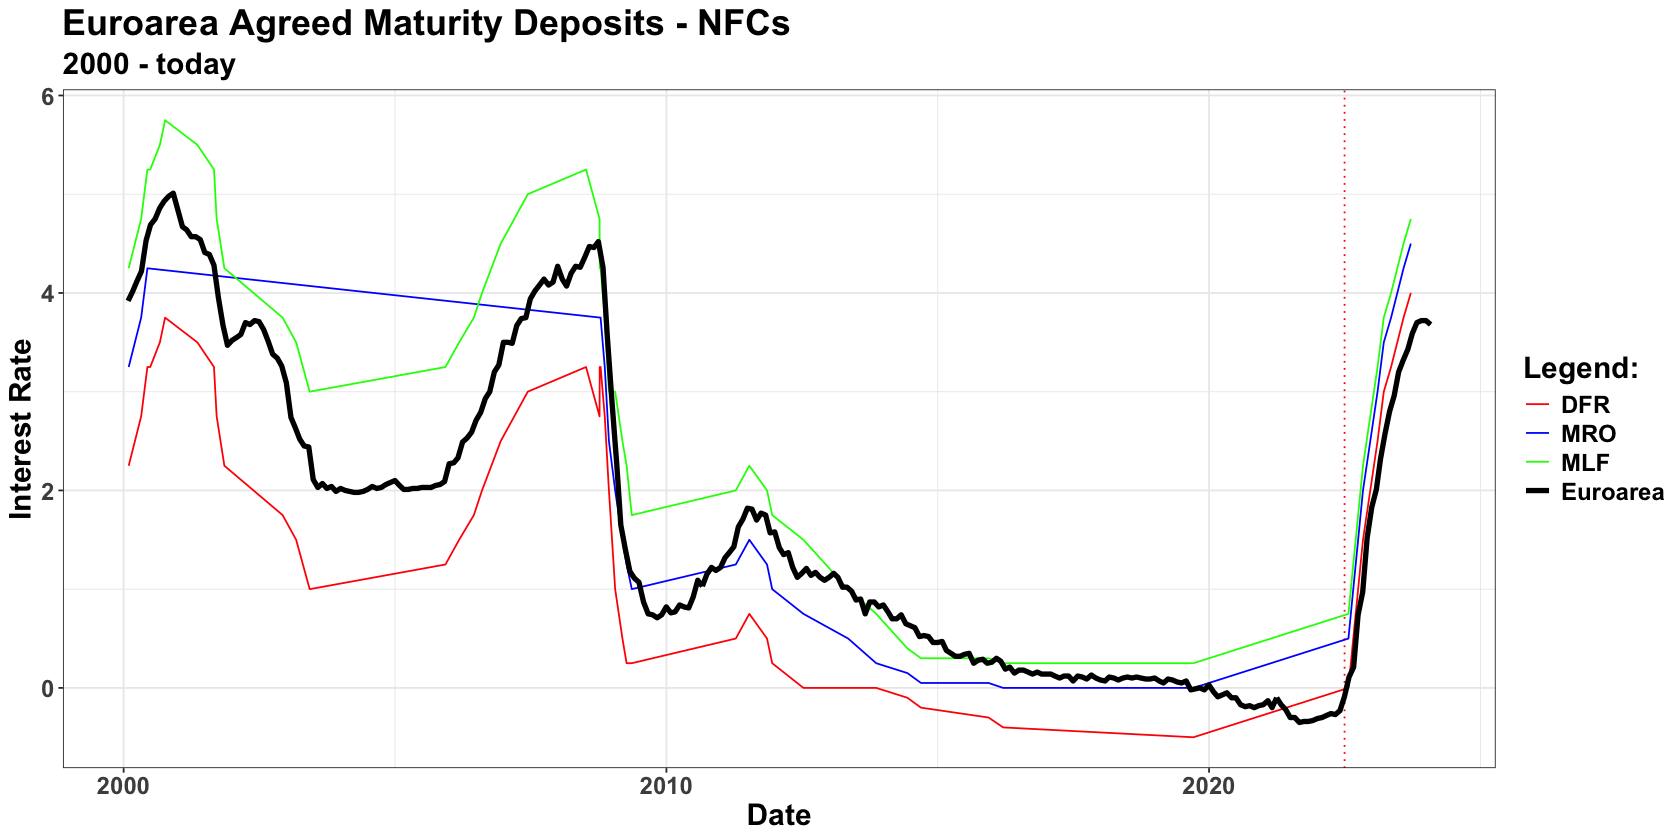

In [82]:
suppressWarnings({
  options(repr.plot.width=14)
  agreedH_EU_long <- melt(agreedH_EU, id.vars = "Date")
  
  ggplot(data = agreedH_EU_long, aes(x = Date, y = value, color = variable)) +
    geom_line() + 
    geom_vline(xintercept = as.numeric(as.Date("2022-07-01")), linetype = "dotted", color = "red") +
    ggtitle("Euroarea Agreed Maturity Deposits - HHs") +
    labs(x = "Date", y = "Interest Rate", subtitle = "2000 - today",
         color = "Legend:") +
    scale_color_manual(values = c("Euroarea" = "black", "DFR" = "red", "MRO" = "blue", "MLF" = "green")) +
    geom_line(data = DFR1, aes(x = Date, y = Rate, color = "DFR")) +
    geom_line(data = MRO1, aes(x = Date, y = Rate, color = "MRO")) +
    geom_line(data = MLF1, aes(x = Date, y = Rate, color = "MLF")) +
    geom_line(data = agreedH_EU, aes(x = Date, y = Rate, color = "Euroarea"), size = 1.5) +# Increase size of Rate line
    theme_bw() +
    theme(text = element_text(face = "bold", size = 18))
})

suppressWarnings({
  options(repr.plot.width=14)
  agreedC_EU_long <- melt(agreedC_EU, id.vars = "Date")
  
  ggplot(data = agreedC_EU_long, aes(x = Date, y = value, color = variable)) +
    geom_line() + 
    geom_vline(xintercept = as.numeric(as.Date("2022-07-01")), linetype = "dotted", color = "red") +
    ggtitle("Euroarea Agreed Maturity Deposits - NFCs") +
    labs(x = "Date", y = "Interest Rate", subtitle = "2000 - today",
         color = "Legend:") +
    scale_color_manual(values = c("Euroarea" = "black", "DFR" = "red", "MRO" = "blue", "MLF" = "green")) +
    geom_line(data = DFR1, aes(x = Date, y = Rate, color = "DFR")) +
    geom_line(data = MRO1, aes(x = Date, y = Rate, color = "MRO")) +
    geom_line(data = MLF1, aes(x = Date, y = Rate, color = "MLF")) +
    geom_line(data = agreedC_EU, aes(x = Date, y = Rate, color = "Euroarea"), size = 1.5) +# Increase size of Rate line
    theme_bw() +
    theme(text = element_text(face = "bold", size = 18))
})

In [67]:
overnightH_EU1 <- subset(overnightH_EU, Date >= as.Date("2020-01-31"))
overnightC_EU1 <- subset(overnightC_EU, Date >= as.Date("2020-01-31"))
agreedH_EU1 <- subset(agreedH_EU, Date >= as.Date("2020-01-31"))
agreedC_EU1 <- subset(agreedC_EU, Date >= as.Date("2020-01-31"))

In [71]:
cat('Overnight deposit rates for Households:','\n')
summary(overnightH_EU$Rate)
cat('Overnight deposit rates for Non-financial Corporations:','\n')
summary(overnightC_EU$Rate)
cat('Agreed maturity deposit rates for Households:','\n')
summary(agreedH_EU$Rate)
cat('Agreed maturity deposit rates for Non-financial Corporations:','\n')
summary(agreedC_EU$Rate)
cat('In average terms, overnight deposit rates for Non-financial Corporations are',round((mean(overnightC_EU1$Rate)-mean(overnightH_EU1$Rate))*100,2),'%', '\n')
cat('higher than for Households.','\n')
cat('In average terms, agreed maturity deposit rates for Households are',round((mean(agreedH_EU1$Rate)-mean(agreedC_EU1$Rate))*100,2),'%', '\n')
cat('higher than for Non-financial Corporations')

Overnight deposit rates for Households: 


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0700  0.4200  0.5103  0.8100  1.5100 

Overnight deposit rates for Non-financial Corporations: 


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-0.0600  0.0800  0.5100  0.6756  1.1500  2.2000 

Agreed maturity deposit rates for Households: 


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.210   0.530   1.970   1.995   2.920   4.760 

Agreed maturity deposit rates for Non-financial Corporations: 


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -0.350   0.160   1.210   1.663   2.930   5.010 

In average terms, overnight deposit rates for Non-financial Corporations are 7.8 % 
higher than for Households. 
In average terms, agreed maturity deposit rates for Households are 16.18 % 
higher than for Non-financial Corporations

# Beta estimation

In [72]:
DFR_filled <- complete(DFR, Date = seq(min(Date), max(Date), by = "day"))
DFR_filled <- DFR_filled %>%
  fill(Rate)
DFR_filled2<-subset(DFR_filled, Date >= as.Date("2022-07-27") & Date <= as.Date("2023-09-20"))

In [74]:
overnightH_EU_filled <- complete(overnightH_EU, Date = seq(min(Date), max(Date), by = "day"))
overnightH_EU_filled <- overnightH_EU_filled %>%
  fill(Rate)
overnightH_EU_filled<-subset(overnightH_EU_filled, Date >= as.Date("2022-07-27") & Date <= as.Date("2023-09-20"))
EU1<-lm(overnightH_EU_filled$Rate~DFR_filled2$Rate)
summary(EU1)

overnightC_EU_filled <- complete(overnightC_EU, Date = seq(min(Date), max(Date), by = "day"))
overnightC_EU_filled <- overnightC_EU_filled %>%
  fill(Rate)
overnightC_EU_filled<-subset(overnightC_EU_filled, Date >= as.Date("2022-07-27") & Date <= as.Date("2023-09-20"))
EU2<-lm(overnightC_EU_filled$Rate~DFR_filled2$Rate)
summary(EU2)


Call:
lm(formula = overnightH_EU_filled$Rate ~ DFR_filled2$Rate)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.06267 -0.03195 -0.00354  0.02196  0.08428 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -0.039505   0.003832  -10.31   <2e-16 ***
DFR_filled2$Rate  0.070726   0.001513   46.74   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.03826 on 419 degrees of freedom
Multiple R-squared:  0.8391,	Adjusted R-squared:  0.8387 
F-statistic:  2185 on 1 and 419 DF,  p-value: < 2.2e-16



Call:
lm(formula = overnightC_EU_filled$Rate ~ DFR_filled2$Rate)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.11235 -0.03166 -0.01235  0.04305  0.11076 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -0.085240   0.006340  -13.45   <2e-16 ***
DFR_filled2$Rate  0.169196   0.002503   67.59   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.0633 on 419 degrees of freedom
Multiple R-squared:  0.916,	Adjusted R-squared:  0.9158 
F-statistic:  4568 on 1 and 419 DF,  p-value: < 2.2e-16


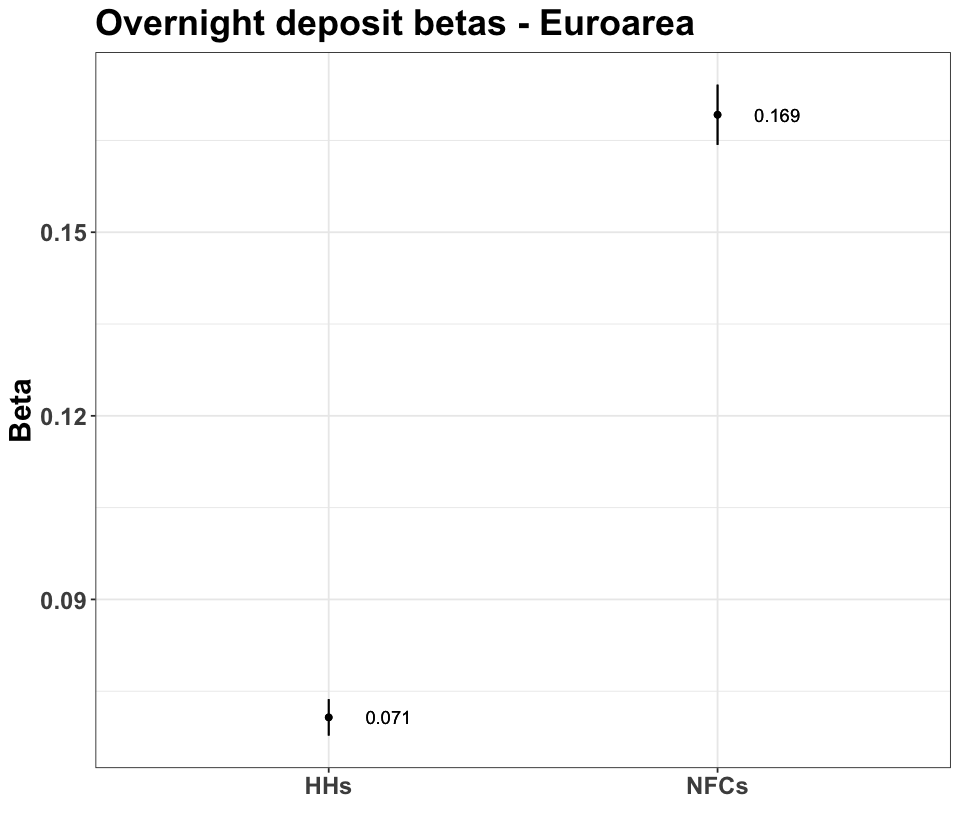

In [76]:
extract_coefs_ci <- function(model) {
  coef_summary <- summary(model)$coefficients[, 1:2]
  names(coef_summary) <- c("Estimate", "Std. Error")
  conf_intervals <- confint(model)
  data.frame(Coefficient = row.names(coef_summary),
             Estimate = coef_summary[2, 1],
             CI_Lower = conf_intervals[2, 1],
             CI_Upper = conf_intervals[2, 2])
}

model_data <- lapply(list(EU1, EU2), extract_coefs_ci)
names(model_data) <- c("HHs", "NFCs")

combined_data <- do.call(rbind, model_data)
combined_data$Model <- rep(names(model_data), sapply(model_data, nrow))

options(repr.plot.width=8)
ggplot(combined_data, aes(x = Model, y = Estimate)) +
  geom_point() +
  geom_segment(aes(x = Model, xend = Model, y = CI_Lower, yend = CI_Upper)) +
  geom_text(aes(label = round(Estimate, 3)), hjust = -0.8) +
ggtitle("Overnight deposit betas - Euroarea") +
  labs(x = "", y = "Beta") +
  theme_bw() + theme(text = element_text(face = "bold", size = 18))

In [73]:
agreedH_EU_filled <- complete(agreedH_EU, Date = seq(min(Date), max(Date), by = "day"))
agreedH_EU_filled <- agreedH_EU_filled %>%
  fill(Rate)
agreedH_EU_filled<-subset(agreedH_EU_filled, Date >= as.Date("2022-07-27") & Date <= as.Date("2023-09-20"))
EU3<-lm(agreedH_EU_filled$Rate~DFR_filled2$Rate)
summary(EU3)

agreedC_EU_filled <- complete(agreedC_EU, Date = seq(min(Date), max(Date), by = "day"))
agreedC_EU_filled <- agreedC_EU_filled %>%
  fill(Rate)
agreedC_EU_filled<-subset(agreedC_EU_filled, Date >= as.Date("2022-07-27") & Date <= as.Date("2023-09-20"))
EU4<-lm(agreedC_EU_filled$Rate~DFR_filled2$Rate)
summary(EU4)


Call:
lm(formula = agreedH_EU_filled$Rate ~ DFR_filled2$Rate)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.29085 -0.11070  0.04407  0.09692  0.30692 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      0.221168   0.016524   13.38   <2e-16 ***
DFR_filled2$Rate 0.669842   0.006524  102.67   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.165 on 419 degrees of freedom
Multiple R-squared:  0.9618,	Adjusted R-squared:  0.9617 
F-statistic: 1.054e+04 on 1 and 419 DF,  p-value: < 2.2e-16



Call:
lm(formula = agreedC_EU_filled$Rate ~ DFR_filled2$Rate)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.44471 -0.06728  0.08529  0.11906  0.31529 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -0.009058   0.018172  -0.498    0.618    
DFR_filled2$Rate  0.885028   0.007175 123.346   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1814 on 419 degrees of freedom
Multiple R-squared:  0.9732,	Adjusted R-squared:  0.9731 
F-statistic: 1.521e+04 on 1 and 419 DF,  p-value: < 2.2e-16


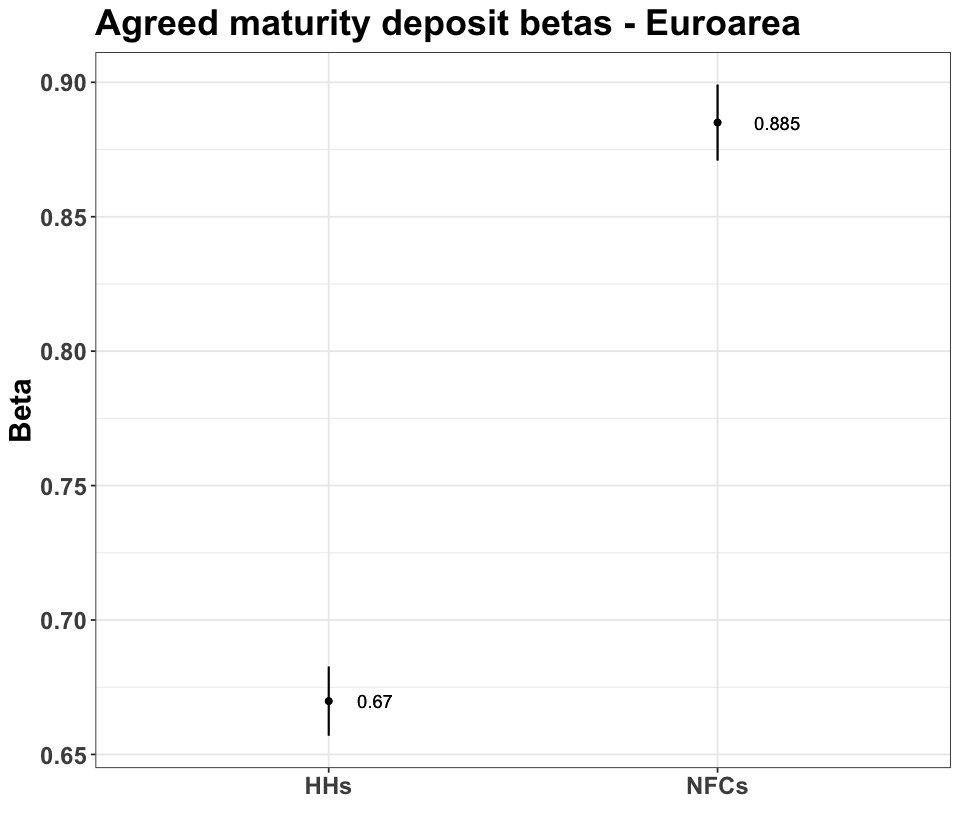

In [77]:
model_data <- lapply(list(EU3, EU4), extract_coefs_ci)
names(model_data) <- c("HHs", "NFCs")

combined_data <- do.call(rbind, model_data)
combined_data$Model <- rep(names(model_data), sapply(model_data, nrow))

options(repr.plot.width=8)
ggplot(combined_data, aes(x = Model, y = Estimate)) +
  geom_point() +
  geom_segment(aes(x = Model, xend = Model, y = CI_Lower, yend = CI_Upper)) +
  geom_text(aes(label = round(Estimate, 3)), hjust = -0.8) +
ggtitle("Agreed maturity deposit betas - Euroarea") +
  labs(x = "", y = "Beta") +
  theme_bw() + theme(text = element_text(face = "bold", size = 18))